# Telecommunication Customer Churn Analysis






We have analyzed the churn dataset of a European Telecom Company, which includes cleaned customer activity data along with a churn label indicating whether a customer has canceled their subscription. Through this exploration and analysis, we aim to identify the key factors driving customer churn and develop strategies and recommendations to improve customer retention.

## Business Understanding of Telecommunicaion Customer Churn
The Telecom industry's customer churn refers to the loss of subscribers who cancel their services. 
Understanding and analyzing churn is crucial for telecom companies, as retaining customers is generally more cost-effective than acquiring new ones.
A high churn rate can lead to significant revenue loss, reduced customer lifetime value, and increased acquisition costs. Factors like service quality, pricing, customer support, and competitor offers play a major role in customer decisions to churn. 
Analyzing churn data helps uncover the key drivers and enables companies to implement strategies to improve customer satisfaction and retention.



#### Project Objective
The main goal of our project is to develop an understanding of the cause of customer churn which assist telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.

In [2]:
## Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## Importing the dataset into the notebook

df = pd.read_csv(r"D:\Data Analysis Projects\Telecom Churn Dataset.csv")

In [4]:
##Brief overview of the dataset columns and rows
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
## Inormation about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.shape

## The dataset consists of 3333 rows and 21 columns

(3333, 21)

In [7]:
## Show the number of unque values

df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
## Summary statistics of the numerical columns

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
## Summary statistics of the categorical columns

df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


The most frequent plan is the International plan

In [10]:
## Checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
## Checking for duplicate values
df[df.duplicated()]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


## Analyzing the Churn Variable

### (1) What is the distribution of churn among customers?

In [12]:
## Show the distribution of churned vs non-churned customers

churn_distribution = df['churn'].value_counts(normalize=True) * 100
print(churn_distribution)


churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


14% of the customers have churned

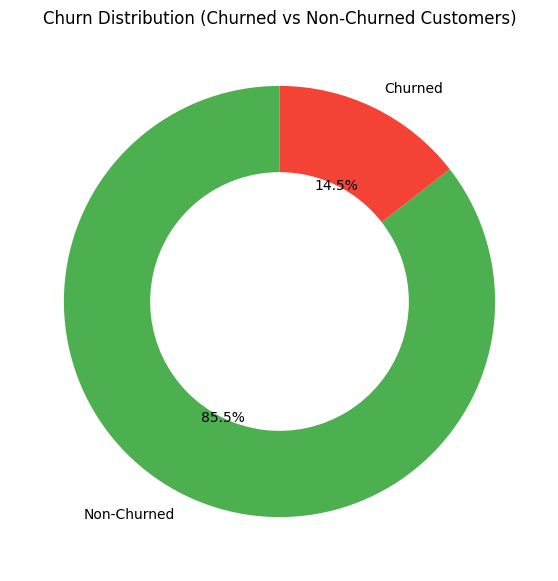

In [49]:

# Calculate the churn distribution as percentages
churn_counts = df['churn'].value_counts(normalize=True) * 100

# Create labels for churned vs non-churned customers
labels = ['Non-Churned', 'Churned']

# Define the colors for the chart
colors = ['#4caf50', '#f44336']

# Create the donut chart
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

centre_circle = plt.Circle((0,0), 0.5, fc='white')
plt.gca().add_artist(centre_circle)

# Display the chart
plt.title('Churn Distribution (Churned vs Non-Churned Customers)')
plt.show()


### (2) How does churn correlate with the number of customer service calls?

<Axes: xlabel='churn', ylabel='customer service calls'>

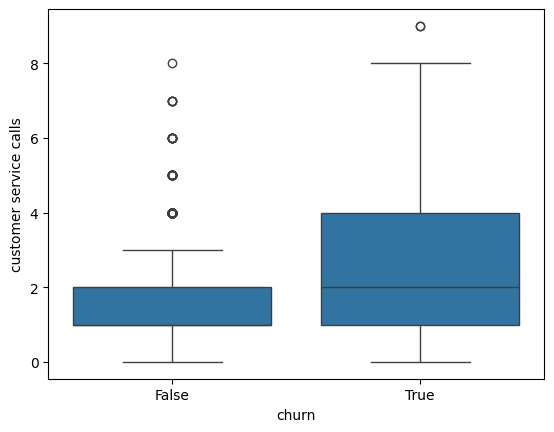

In [14]:
# Compare customer service calls with churn
import seaborn as sns
sns.boxplot(x='churn', y='customer service calls', data=df)


From the plot above, people who churned engaged in calling the customer service.

 ### (3) Is there a relationship between the total minutes of usage (day, evening, night, international) and churn?

Compare total minutes with churn for each period (day, evening, night, international)


C:\Users\SD\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


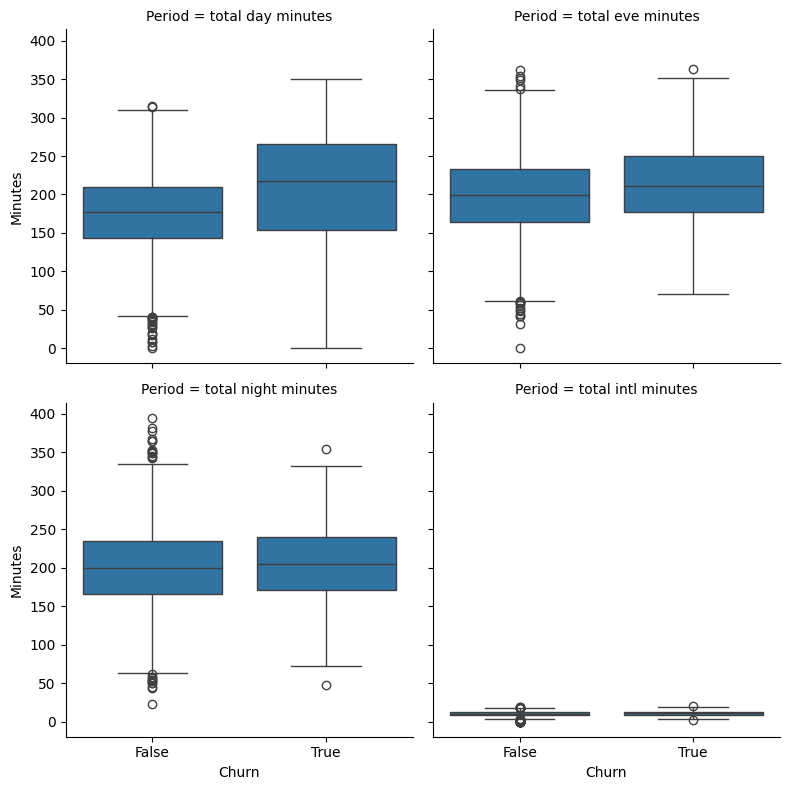

In [15]:

# Create a FacetGrid with different time periods
time_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
df_melted = df.melt(id_vars=['churn'], value_vars=time_columns, var_name='Period', value_name='Minutes')

g = sns.FacetGrid(df_melted, col="Period", col_wrap=2, height=4)
g.map(sns.boxplot, 'churn', 'Minutes')
g.set_axis_labels('Churn', 'Minutes')
plt.show()


The customer who churned had the overall highest minutes in terms of calls,except for International calls.

### (4) What is the average number of calls in the day, evening, and night for churned vs non-churned customers?

In [27]:
# Average calls by time of day for churn vs non-churntotal day calls', 'total eve calls', 'total night calls'
df.groupby('churn')[['total day calls', 'total eve calls', 'total night calls']].mean()



,total day calls,total eve calls,total night calls
churn,,,
False,100.283158,100.038596,100.058246
True,101.335404,100.561077,100.399586


The customers who churned had the highest average when it comes to making calls with the company.

 ### (5) What is the distribution of the "account length" for customers who churn vs those who don't?

<Axes: xlabel='churn', ylabel='account length'>

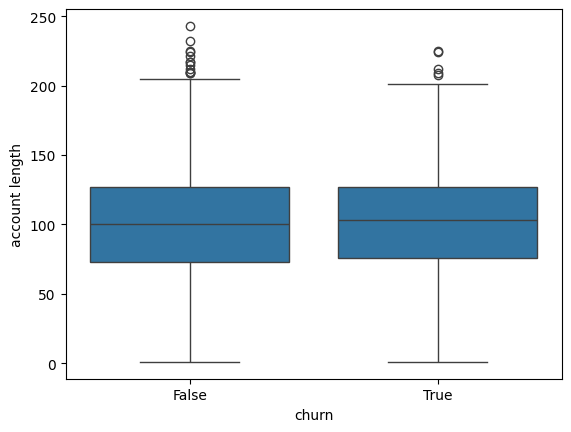

In [37]:
# Compare account length for churn vs non-churn
sns.boxplot(x='churn', y='account length', data=df)


Non churned customers had the highest account length according to this boxplot.

## (6) What is the correlation between numerical features (e.g., total minutes, charges) and churn?

In [44]:
# Convert 'churn' column from boolean to numeric (True=1, False=0)
df['churn2'] = df['churn'].astype(int)

# Select numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Print the correlation between churn and other numerical features
print(corr['churn2'].sort_values(ascending=False))


churn2                    1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn2, dtype: float64


Strongest positive correlations: customer service calls, total day minutes, and total day charge are moderately correlated with churn. Customers who are likely to churn tend to make more customer service calls and use more daytime minutes and incur higher charges during the day.

Weak positive correlations: Features like total eve minutes, total intl charge, and total night minutes have weak positive correlations with churn, indicating a slight tendency for customers with higher usage in these categories to churn.

Weak negative correlations: Some features like total intl calls and number of voicemail messages show weak negative correlations with churn, suggesting that customers with more international calls or voicemail messages may be slightly less likely to churn, but the effect is not strong.

No meaningful correlations: Features like area code, total eve calls, and account length show either no correlation or extremely weak correlations with churn.

### (7) How do churn rates differ based on area code?

<Axes: xlabel='area code', ylabel='count'>

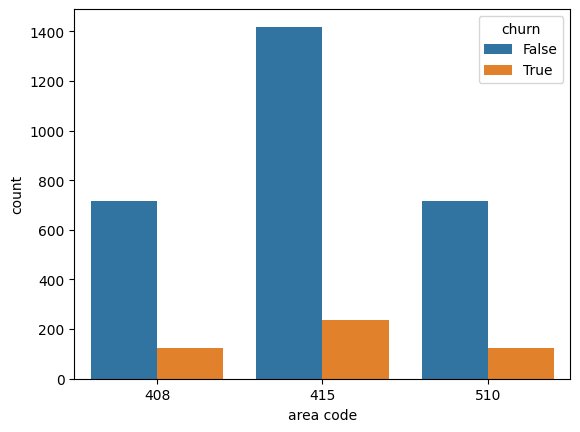

In [45]:
# Churn rate by area code
sns.countplot(x='area code', hue='churn', data=df)


 The 415 area code has majority of the customers and it appears it also had the highest churn rate. Area code 408 had the lowesr churn rate.

### (8)  Is there a difference in the total charges (day, evening, night, international) between churned and non-churned customers?

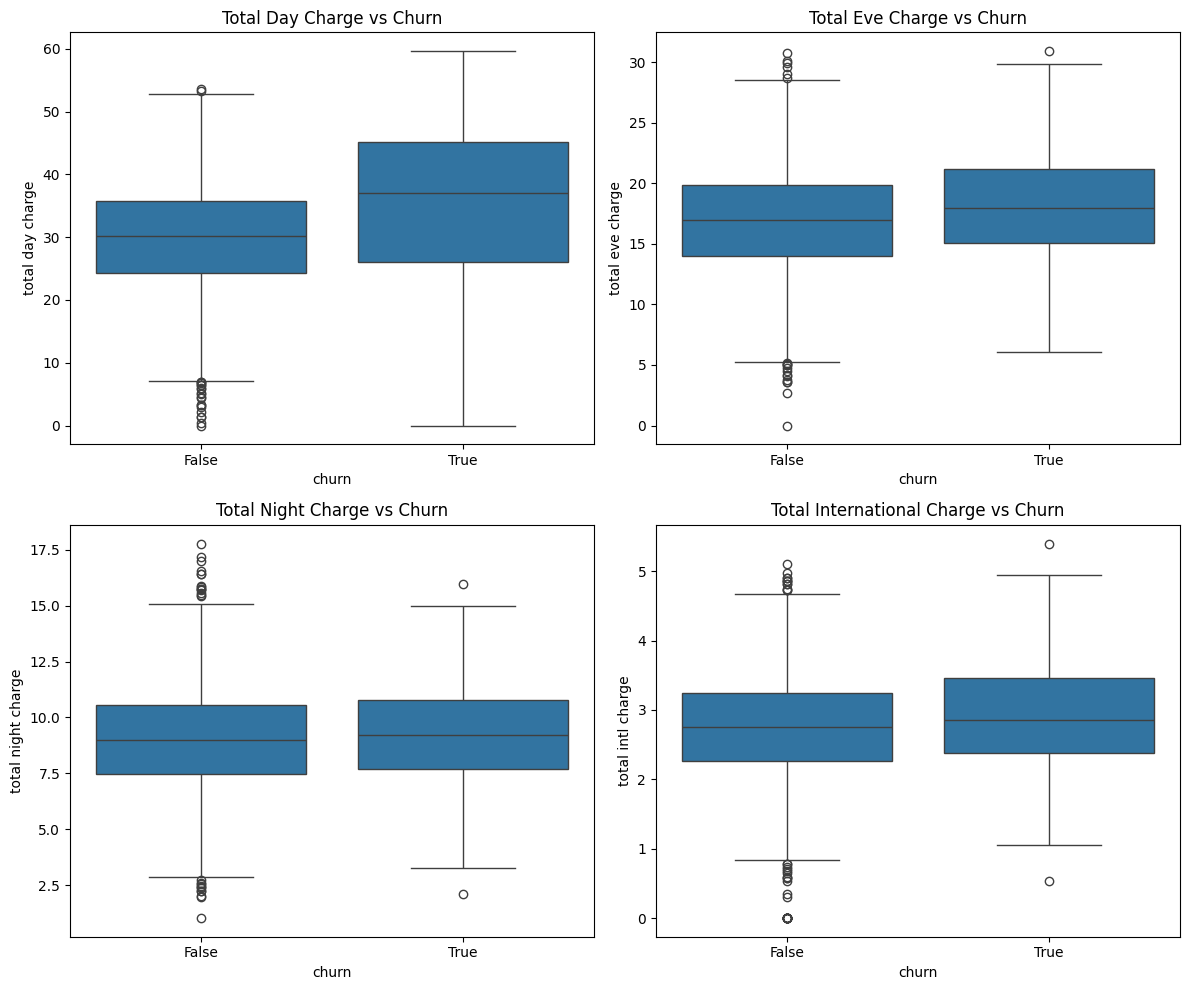

In [47]:
# Compare total charges with churn

# Set the figure size and style for better display
plt.figure(figsize=(12, 10))

# Create a grid of subplots: 2 rows, 2 columns
plt.subplot(2, 2, 1)
sns.boxplot(x='churn', y='total day charge', data=df)
plt.title('Total Day Charge vs Churn')

plt.subplot(2, 2, 2)
sns.boxplot(x='churn', y='total eve charge', data=df)
plt.title('Total Eve Charge vs Churn')

plt.subplot(2, 2, 3)
sns.boxplot(x='churn', y='total night charge', data=df)
plt.title('Total Night Charge vs Churn')

plt.subplot(2, 2, 4)
sns.boxplot(x='churn', y='total intl charge', data=df)
plt.title('Total International Charge vs Churn')

plt.tight_layout()

plt.show()


There is a significant difference between the  charges and customer who churned and those who didnt. Daytime and International Usage: Customers who churned typically had higher  charges compared to non-churned customers, except for the night charge.

### (9) Are there significant differences in churn based on the "number of voicemail messages"?

<Axes: xlabel='churn', ylabel='number vmail messages'>

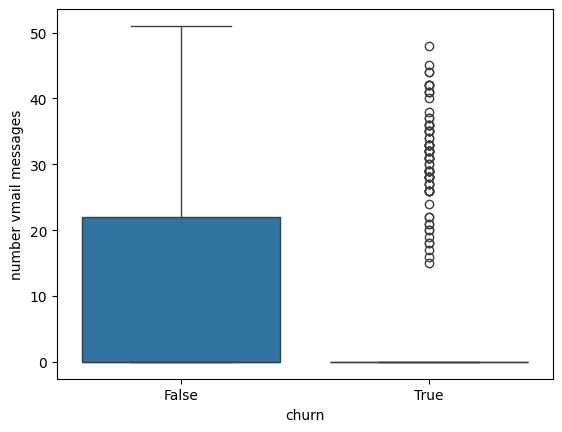

In [48]:
# Distribution of voicemail messages based on churn
sns.boxplot(x='churn', y='number vmail messages', data=df)


The customer who didnt churn had a higher number of voicemail messages, compared to the customers who churned.



### **Findings**

1. **Churn Rate**:
   - **14% of the customers have churned**, indicating that a notable portion of the customer base has discontinued service.

2. **Customer Service Calls and Churn**:
   - Customers who churned tended to make **more customer service calls** compared to those who remained. This suggests that **increased customer service interaction** might be indicative of dissatisfaction or issues that could lead to churn.

3. **Usage Patterns and Charges**:
   - Churned customers exhibited higher overall **call minutes**, particularly in **daytime usage**, with higher **total day charges** and **total day minutes**. This suggests that customers who use the service more (during the day) tend to churn more frequently, possibly due to **high service costs or dissatisfaction** with the service.
   - Interestingly, **international calls** did not follow the same trend, with churned customers showing **lower international charges** compared to their non-churned counterparts.

4. **Account Length**:
   - Non-churned customers, on average, had a **longer account length**, indicating that customers who have been with the service for a longer time tend to stay longer, while newer customers may be more likely to churn.

5. **Correlation with Churn**:
   - **Moderate positive correlations** were found between churn and the following features:
     - **Customer service calls**: Higher interaction with customer service correlates with churn.
     - **Total day minutes** and **total day charge**: Churned customers tend to use more daytime minutes and incur higher charges.
   - **Weak positive correlations**:
     - **Total evening minutes**, **total international charge**, and **total night minutes** show weak correlations with churn, suggesting that while there is some relationship, it is not as strong.
   - **Weak negative correlations**:
     - **International calls** and **number of voicemail messages** were weakly negatively correlated with churn, indicating that customers who make more international calls or receive more voicemail messages may be less likely to churn, though this effect is minimal.
   - **No meaningful correlations**:
     - Features such as **area code**, **total evening calls**, and **account length** showed either no correlation or very weak correlations with churn.

6. **Area Code and Churn**:
   - The **415 area code** represented the majority of customers and also had the **highest churn rate**, while the **408 area code** exhibited the **lowest churn rate**. This could suggest regional factors influencing churn, such as network quality or pricing structures.

7. **Significant Differences in Charges**:
   - There is a **statistically significant difference** between the charges for churned and non-churned customers. Churned customers tend to have **higher day and international charges**, which may indicate that high service costs or billing issues contribute to their decision to churn. Conversely, **night charges** showed no significant difference.

8. **Voicemail Messages and Churn**:
   - Non-churned customers had a **higher number of voicemail messages** compared to churned customers, suggesting that churned customers might be less engaged or less satisfied with the service.

---

### **Conclusion:**

The analysis reveals several key insights into customer churn. Customers who churned tend to have higher daytime usage and charges, suggesting that high service costs could be a significant factor influencing their decision to leave. Additionally, higher customer service interactions correlate with churn, indicating that unresolved issues may play a role in customer dissatisfaction. Interestingly, non-churned customers tend to have a longer account length and higher engagement with the service, including voicemail usage.

Geographic factors, such as area codes, also seem to influence churn rates, with the **415 area code** experiencing the highest churn rate. These findings suggest that there may be regional or network-related factors impacting customer retention.

---

### **Recommendations:**

1. **Focus on High-Usage Customers**:
   - Since customers with **higher day and international charges** are more likely to churn, the company should consider offering **better pricing plans** for heavy users. This could include **daytime or international calling plans** that are more cost-effective or flexible to reduce high charges.
   
2. **Enhance Customer Service Interaction**:
   - The moderate correlation between **customer service calls** and churn indicates that customers who frequently contact customer service may be facing unresolved issues. The company should **improve its customer service experience**, ensuring that concerns are addressed promptly to prevent churn. A **proactive approach**, such as offering personalized support for high-usage customers, could help reduce churn.

3. **Increase Customer Engagement**:
   - Since non-churned customers have a higher **number of voicemail messages**, the company should explore ways to engage customers more effectively, such as by encouraging the use of voicemail features or offering incentives for continued service usage.

4. **Investigate Regional Factors**:
   - Given the differences in churn by **area code**, the company should investigate whether there are specific network, service quality, or pricing issues that disproportionately affect customers in the **415 area code**. Targeted interventions in these regions could help reduce churn.

5. **Offer Long-Term Incentives**:
   - Customers with **longer account lengths** are less likely to churn. The company should introduce loyalty programs or **long-term discounts** to reward customers who stay with the service for extended periods, thus incentivizing them to remain with the company.

6. **Address Billing Concerns**:
   - Since high charges are correlated with churn, ensuring **clear billing practices** and offering **flexible payment options** could mitigate churn caused by billing concerns.

By addressing these areas, the company can better target at-risk customers, improve satisfaction, and reduce overall churn.

--- 
